<a href="https://colab.research.google.com/github/DolgorTs/resumeandprojects.github/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D1%8B%D0%BD%D0%BA%D0%B0_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“Анализ рынка жилой недвижимости Москвы (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели стоимости)”


В исследуемом датасете представлены объявления о продаже квартир в Москве на 25.04.2024 с сайта [cian](https://www.cian.ru/).

Датасет взят с [kaggle.com](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fivan314sh%2Fprices-of-moscow-apartments)


**Основные задача** - изучение и оценка текущего состояния и перспектив развития рынка жилой недвижимости г. Москвы.

**Цель анализа**: в рамках, имеющихся данных о продажах квартир в г. Москве с сайта Циан, научиться определять рыночную стоимость квартир, выявить основные факторы, которые на них влияют, для составления рекомендаций стейкхолдерам по направлению развития бизнеса.

**Бизнес задачи:**

• Сбор и очистка данных позволит разработать отчетность для стейкхолдеров;

•        Анализ тенденций на рынке продаж квартир в г. Москве даст понимание направления стратегии развития бизнеса;

•        Определение цены на основе модели машинного обучения даст конкурентное преимущество стейкхолдерам, т.к. не будет большого расхождения между ценой в объявлении и ценой сделки.

**Обобщённые метрики:**

•        Средняя стоимость квадратного метра квартиры;

•        Средняя стоимость квадратного метра квартиры новостройки и вторички;  

•        Средняя стоимость квадратного метра квартиры апартаменты и обычные квартиры.

**Возможные стейкхолдеры:**

• Агентства недвижимости;

• Банки, государство;

• Покупатели, продавцы квартир;

•  Застройщики, девелоперы.

**Интересы стейкхолдеров**:

•        Интересы девелоперов, продавцов, риелторов – высокие и эффективные продаж, понимание рынка недвижимости, его направлений в развитии.

•        Интерес покупателей – покупка жилья по доступной цене на выгодных условиях в подходящем районе.

•        Интерес государства – обеспечение граждан жильем, поддержка в покупках, развитие и регулирование рынка недвижимости.

•        Интерес банка – увеличение выдачи ипотек и кредитов застройщикам.

**Этапы выполнения работы:**
1. Сбор и очистка данных;
2. Анализ для стейкхолдеров;
3. Проверка гипотез;
4. Матрица корреляций и попарные зависимости переменных;
5. Построение модели линейной регресии для прогнозирования стоимости квартиры в Москве.

**1. Сбор и очистка данных**

In [ ]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
from scipy.stats import f_oneway
from scipy.stats import shapiro
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [ ]:
# подгружаем датасет
df = pd.read_csv('moscow_flats_dataset_eng.csv', na_values = '?')
df

,price,min_to_metro,region_of_moscow,total_area,living_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,link
0,31633073.0,24.0,SAR,64.2,32.4,11.0,16.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/293204033/
1,29293000.0,9.0,NEAR,78.1,NaN,9.0,27.0,2022.0,1.0,0.0,NaN,2.0,https://www.cian.ru/sale/flat/294033524/
2,30349669.0,5.0,SAR,72.4,33.6,3.0,24.0,2023.0,1.0,0.0,3.15,2.0,https://www.cian.ru/sale/flat/300712697/
3,31845511.0,19.0,SAR,69.2,NaN,2.0,12.0,2024.0,1.0,0.0,2.97,2.0,https://www.cian.ru/sale/flat/300228448/
4,38810000.0,27.0,WAR,66.9,24.8,9.0,14.0,2023.0,1.0,0.0,3.00,2.0,https://www.cian.ru/sale/flat/299262105/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,29504877.0,6.0,NAR,86.1,49.5,3.0,12.0,NaN,0.0,0.0,NaN,4.0,https://www.cian.ru/sale/flat/298617209/
6979,120000000.0,2.0,CAR,163.5,96.0,6.0,6.0,1998.0,0.0,0.0,3.00,4.0,https://www.cian.ru/sale/flat/297548153/
6980,165000000.0,7.0,CAR,154.0,76.0,16.0,21.0,2023.0,0.0,0.0,NaN,4.0,https://www.cian.ru/sale/flat/295795425/
6981,21500000.0,11.0,SEAR,94.2,69.0,2.0,5.0,NaN,0.0,0.0,2.80,4.0,https://www.cian.ru/sale/flat/300870085/


In [ ]:
# размер датасета
df.shape

(6983, 13)

Датасет довольно большой всего 6 983 строк, и 13 столбцов.

In [ ]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6961 non-null   float64
 1   min_to_metro       6846 non-null   float64
 2   region_of_moscow   6892 non-null   object 
 3   total_area         6960 non-null   float64
 4   living_area        4514 non-null   float64
 5   floor              6960 non-null   float64
 6   number_of_floors   6960 non-null   float64
 7   construction_year  5761 non-null   float64
 8   is_new             6949 non-null   float64
 9   is_apartments      6949 non-null   float64
 10  ceiling_height     5053 non-null   float64
 11  number_of_rooms    6983 non-null   float64
 12  link               6983 non-null   object 
dtypes: float64(11), object(2)
memory usage: 709.3+ KB


Описание полей датасета:

- price: Стоимость квартиры;
- min_to_metro: Расстояние от квартиры до метро в минутах;
- region_of_moscow: Административный округ (район) Москвы;
- total_area: Общая площадь квартиры;
- living_area: Жилая площадь квартиры;
- floor: Этаж квартиры;
- number_of_floors: Количество этажей в доме;
- construction_year: Год постройки дома;
- is_new: Признак новостройка - 1 или вторичное жилье - 0;
- is_apartments: Признак апартаменты - 1 или квартира - 0;
- ceiling_height: Высота потолков;
- number_of_rooms: Количество комнат;
- link: Ссылка на объявление;
- price_of_metr*: стоимость одного кв. метра;

*По ходу работы будет добавлен новый столбец price_of_metr - как отношение стоимости квартиры (price) к общей площади (total_area).


В датасете большинство переменных в формате float.
Логично, что переменные: construction_year (год постройки), is_new (признак новостройки или вторички),is_apartments (признак апартаментов), number_of_floors (количество этажей в дома), floor (этаж квартиры), number_of_rooms (количество комнат) не могут выражаться дробным числом, поэтому изменим типы данных этих переменных с float на Int:

In [ ]:
# преобразовываем типы данных с float на int
df[['construction_year',
    'is_new', 'is_apartments',
    'number_of_rooms',
    'number_of_floors',
    'floor']] = df[['construction_year',
                                     'is_new',
                                     'is_apartments',
                                     'number_of_rooms',
                                     'number_of_floors',
                                     'floor',
                                      ]].astype ('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6961 non-null   float64
 1   min_to_metro       6846 non-null   float64
 2   region_of_moscow   6892 non-null   object 
 3   total_area         6960 non-null   float64
 4   living_area        4514 non-null   float64
 5   floor              6960 non-null   Int64  
 6   number_of_floors   6960 non-null   Int64  
 7   construction_year  5761 non-null   Int64  
 8   is_new             6949 non-null   Int64  
 9   is_apartments      6949 non-null   Int64  
 10  ceiling_height     5053 non-null   float64
 11  number_of_rooms    6983 non-null   Int64  
 12  link               6983 non-null   object 
dtypes: Int64(6), float64(5), object(2)
memory usage: 750.3+ KB


In [ ]:
# Рассчитаем и опишем базовые статистики количественных переменных:
pd.options.display.float_format = '{:,.2f}'.format
df[['price','min_to_metro', 'total_area', 'living_area', 'construction_year', 'ceiling_height']].describe()

,price,min_to_metro,total_area,living_area,construction_year,ceiling_height
count,"6,961.00","6,846.00","6,960.00","4,514.00","5,761.00","5,053.00"
mean,"59,910,861.44",13.18,84.14,44.93,"2,003.24",3.04
std,"93,538,800.24",77.16,51.83,30.81,28.49,0.71
min,"800,000.00",1.00,9.00,1.00,"1,820.00",2.00
25%,"16,500,000.00",6.00,45.00,20.62,"1,987.00",2.70
50%,"30,500,000.00",9.00,70.85,37.50,"2,019.00",3.00
75%,"63,000,000.00",14.00,106.10,60.00,"2,023.00",3.15
max,"3,737,636,000.00","2,025.00",530.00,350.00,"2,027.00",30.00


*   **price**. Мин цена - 800 тыс.руб., макс цена - 3,7 млрд руб. Средняя цена - 59 млн руб. Скорей всего есть выбросы, т.к. в 4 квартиле цены от 63 млн руб до 3,7 млрд. руб. Большая вариация данных (std = 93,5 млн.)предположительно из-за того, что в датафрейме есть объявления о продажах долей квартир (в ценах от 800 тыс руб до примерно 7 млн руб) и элитных очень дорогих квартир, цены на которые значительно больше.

*   **min to metro**. Сред время до метро - 13 минут. Минимально время 1 минута, максимальное - 2025 минут (33 часа). Максимальное значение является аномальным, скорее всего это ошибка ввода данных.

- **total area.** Общая площадь квартиры. Сред площадь - 84 кв м. Выбросов думаю нет, большая разница мин 9 квм и макс 530 квм значений объясняется тем, что продаются доли квартир и большие квартиры.

- **living_area.** Жилая площадь квартиры. Переменная схожая по смыслу с total area, но показывающая жилую площадь. Пропусков довольно много. Есть аномальное значение - 1, что не является правдоподобным. В остальном отклонений нет.

- **construction_year** год постройки дома.В этом столбце много пропущенных значений. Разброс от среднего - 28 лет. Самый старый дом в нашем датасете - 1820 года, самый новый - 2027, т.е. квартиры продаются еще на этапе строительства. Большая часть домов была построена в промежутке с 1987 года по 2023 год.

- **ceiling_height** высота потолков. Минимальное значение - 2 метра, максимальное - 30 метров, что скорей всего является выбросом. В целом высота потолков отличается на 70 см.


**Рассчитаем и опишем базовые статистики категориальных и дискретных переменных:**

In [ ]:
print('Регионы Москвы:')
print('mode:')
print(df['region_of_moscow'].mode()[0])
print('--------')
print('распределение:')
print(df['region_of_moscow'].value_counts())
print('--------')
print('уникальные значения:')
print(df['region_of_moscow'].unique())
print('--------')
print('распределение в %:')
print(df['region_of_moscow'].value_counts()/len(df)*100)

Регионы Москвы:
mode:
CAR
--------
распределение:
region_of_moscow
CAR     1663
WAR     1263
NWAR     724
SAR      698
NAR      655
NEAR     543
SEAR     502
SWAR     467
EAR      377
Name: count, dtype: int64
--------
уникальные значения:
['SAR' 'NEAR' 'WAR' 'CAR' 'SWAR' 'EAR' 'SEAR' 'NWAR' 'NAR' nan]
--------
распределение в %:
region_of_moscow
CAR    23.81
WAR    18.09
NWAR   10.37
SAR    10.00
NAR     9.38
NEAR    7.78
SEAR    7.19
SWAR    6.69
EAR     5.40
Name: count, dtype: float64


По распределению видно, что больше всего объявлений о продажах квартир в округах ЦАО - 23%, и ЗАО - 18%, наименьшее - в ВАО - 5,4%. То есть в центре и на западе Москвы квартиры продаются чаще, чем в других районах, а меньше всего на востоке.


In [ ]:
print('floor:')
print('mode:')
print(df['floor'].mode()[0])
print('--------')
print('распределение:')
print(df['floor'].value_counts())
print('--------')
print('уникальные значения:')
print(df['floor'].unique())
print('максимальное значение:')
print(df['floor'].max())
print('минимальное значение:')
print(df['floor'].min())

floor:
mode:
2
--------
распределение:
floor
2     709
3     670
4     615
5     524
6     462
     ... 
75      2
-1      1
56      1
64      1
58      1
Name: count, Length: 76, dtype: Int64
--------
уникальные значения:
<IntegerArray>
[  11,    9,    3,    2,    6,   52,    8,   26,   23,   32,    7,   12,    5,
   14,   15,   10,   27,   24,   37,   13,   30,   16,   28,    4,   17,   18,
   38,   29,   47,   42,   34,   21,    1,   25,   43,   41,   35,   44,   20,
   33,   40,   19,   51,   46,   22,   36,   31,   45,   59,   65,   39,   48,
   67,   63,   55,   57,   62,   69,   50,   54,   79,   72,   58,   49, <NA>,
   -1,   68,   61,   56,   53,   70,   66,   73,   76,   75,   64,   80]
Length: 77, dtype: Int64
максимальное значение:
80
минимальное значение:
-1


 **floor** - этаж квартиры.  Больше всего объявлений о продажах квартир на со 2 по 6 этажах. В датафрейме также есть объявления о продажах в высокоэтажных домах до 80 этажей. Есть отрицательное значения этажа -1, возможно квартира расположена в подвале или цокольном этаже, что вполне реально.  


In [ ]:
print('number_of_floors:')
print('mode:')
print(df['number_of_floors'].mode()[0])
print('--------')
print('распределение:')
print(df['number_of_floors'].value_counts())
print('--------')
print('уникальные значения:')
print(df['number_of_floors'].unique())
print('максимальное значение:')
print(df['number_of_floors'].max())
print('минимальное значение:')
print(df['number_of_floors'].min())

number_of_floors:
mode:
9
--------
распределение:
number_of_floors
9     698
12    433
14    399
5     372
22    298
     ... 
69      1
88      1
84      1
80      1
82      1
Name: count, Length: 78, dtype: Int64
--------
уникальные значения:
<IntegerArray>
[  16,   27,   24,   12,   14,    7,   66,   46,   26,   23,   57,   41,   15,
    8,   34,   29,   21,   22,   13,   32,   28,   48,   33,   43,   11,    6,
   44,   35,   20,   52,   47,   37,   25,   30,    9,   10,   54,   42,   17,
   85,    3,   40,   51,   18,    5,   19,   56,   78,   58,   67,   53,   31,
   36,   59,   65,    4,   73,   75,   88,   77,   79,   38,   95,    2,   49,
   80,   50,   45,   76,   39, <NA>,   55,    1,   62,   84,   68,   60,   69,
   82]
Length: 79, dtype: Int64
максимальное значение:
95
минимальное значение:
1


**number_of_floors** - это этажность дома. Пропусков немного. Больше всего объявлений о продажах квартир в домах с 9 этажами, также часто встречаются дома с 12, 14, 5, и 22 этажами. Данные вполне правдоподобны.


In [ ]:
print('Is_new:')
print('mode:')
print(df['is_new'].mode()[0])
print('--------')
print('распределение:')
print(df['is_new'].value_counts())
print('--------')
print('уникальные значения:')
print(df['is_new'].unique())

Is_new:
mode:
0
--------
распределение:
is_new
0    5091
1    1858
Name: count, dtype: Int64
--------
уникальные значения:
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64


**Is_new** - это признак новостройка - 1, или вторичное жилье - 0.
Мода этой переменной - вторички (0), распределение 73% - вторички, 27% - новостройки.
Можно сказать, что в нашем датасете преобладают объявления по продаже вторичного жилья.


In [ ]:
print('Апартаменты:')
print('mode:')
print(df['is_apartments'].mode()[0])
print('--------')
print('распределение:')
print(df['is_apartments'].value_counts())
print('--------')
print('уникальные значения:')
print(df['is_apartments'].unique())

Апартаменты:
mode:
0
--------
распределение:
is_apartments
0    5861
1    1088
Name: count, dtype: Int64
--------
уникальные значения:
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64


**is_apartments** - это признак апартаменты в объявлении - 1, или нет - 0.
Апартаменты - это нежилая недвижимость, в ней нельзя получить постоянную регистрацию — только временную по месту пребывания. И обычно апартаменты стоят дешевле, чем обычные квартиры (неапартаменты).
В нашем датасете распределение - 84% неапартаменты, а 16% - апартаменты, что вполне реалистично.  

In [ ]:
print('number_of_rooms:')
print('mode:')
print(df['number_of_rooms'].mode()[0])
print('--------')
print('распределение:')
print(df['number_of_rooms'].value_counts())
print('--------')
print('уникальные значения:')
print(df['number_of_rooms'].unique())

number_of_rooms:
mode:
2
--------
распределение:
number_of_rooms
2    2032
3    1713
4    1627
1    1611
Name: count, dtype: Int64
--------
уникальные значения:
<IntegerArray>
[2, 1, 3, 4]
Length: 4, dtype: Int64


В датасете объявления о продажах 1, 2, 3, 4 комнатных квартир. Наиболее часто встречаются объявления о продаже 2комнатных квартир. И в наименьшем количестве 1комнатных. В датасете нет объявлений о продаже 5комнатных и более комнатных квартир.

In [ ]:
# Процент пропущенных значений в датасете:
df.isnull().sum()/len(df)*100

,0
price,0.32
min_to_metro,1.96
region_of_moscow,1.30
total_area,0.33
living_area,35.36
floor,0.33
number_of_floors,0.33
construction_year,17.50
is_new,0.49
is_apartments,0.49


В датасете есть пропущенные значения, и довольно много в столбцах: living_area, construction_year, ceiling_height. Возможно пропуска из-за ошибок в заполнении объявлений, либо какие-то данные не заполнены намерено.
Переменные living_area и total_area имеют схожий смысл - показывают площадь квартиры, но в датасете в total_area немного пропущенных значений, поэтому можно удалить столбец living_area.
Также удалим строки с пропусками во всех остальных столбцах, т.к. их немного, кроме - столбцов: construction_year и ceiling_height.
construction_year и ceiling_height - показатели довольны важные при формировании цены на квартиру.
Удалим столбце link, т.к. для дальнейшего анализа информация избыточна.

In [ ]:
# удаление лишних столбцов и пропущенных значений
new_df = df
new_df = new_df.dropna (subset=['price'])
new_df = new_df.dropna (subset=['min_to_metro'])
new_df = new_df.dropna (subset=['region_of_moscow'])
new_df = new_df.dropna (subset=['is_new'])
new_df = new_df.dropna (subset=['is_apartments'])
new_df = new_df.dropna (subset=['total_area'])
new_df = new_df.dropna (subset=['floor'])
new_df = new_df.dropna (subset=['number_of_floors'])
new_df.drop(['living_area'], axis= 1 , inplace= True )
new_df.drop(['link'], axis= 1 , inplace= True )
new_df.isnull().sum()/len(df)*100
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6769 entries, 0 to 6982
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6769 non-null   float64
 1   min_to_metro       6769 non-null   float64
 2   region_of_moscow   6769 non-null   object 
 3   total_area         6769 non-null   float64
 4   floor              6769 non-null   Int64  
 5   number_of_floors   6769 non-null   Int64  
 6   construction_year  5611 non-null   Int64  
 7   is_new             6769 non-null   Int64  
 8   is_apartments      6769 non-null   Int64  
 9   ceiling_height     4917 non-null   float64
 10  number_of_rooms    6769 non-null   Int64  
dtypes: Int64(6), float64(4), object(1)
memory usage: 674.3+ KB


Пропущенные значения остались только в столбцах construction_year и ceiling_height.
Логично, что год постройки в нашем датасете может быть зависим от признака is_new, т.е. вторичное жилье имеет одно значение моды, а первичное другое. Поэтому заменим пропуска в столбце construction_year модой по группировке по признаку is_new.
В столбце ceiling_height много пропусков, заменим их на медианное значение  - 3 м, по-моему мнению это средняя высота потолков в квартирах.  

In [ ]:
# замена пропущенных значений
new_df['construction_year'] = new_df['construction_year'].fillna(df.groupby('is_new')['construction_year'].transform(lambda x: x.mode()[0]))
print(new_df['ceiling_height'].median())
new_df['ceiling_height'].fillna(new_df['ceiling_height'].median(), inplace=True)
new_df.info()

3.0
<class 'pandas.core.frame.DataFrame'>
Index: 6769 entries, 0 to 6982
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              6769 non-null   float64
 1   min_to_metro       6769 non-null   float64
 2   region_of_moscow   6769 non-null   object 
 3   total_area         6769 non-null   float64
 4   floor              6769 non-null   Int64  
 5   number_of_floors   6769 non-null   Int64  
 6   construction_year  6769 non-null   Int64  
 7   is_new             6769 non-null   Int64  
 8   is_apartments      6769 non-null   Int64  
 9   ceiling_height     6769 non-null   float64
 10  number_of_rooms    6769 non-null   Int64  
dtypes: Int64(6), float64(4), object(1)
memory usage: 674.3+ KB


<ipython-input-14-71c6a850eabe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




Мы проработали пропущенные значения в датасете.
Из таблицы выше видно, что аномальных значений нет, кроме как в столбцах ceiling_height - 2 и 30, и min_to_metro - 2025. Посмотрим на распределение данных в каждом из этих столбцах:

In [ ]:
fig = px.histogram(
    data_frame=new_df,
    x='ceiling_height',
    title='Распределение высоты потолков',
    marginal='box',
    histnorm='percent'
)
fig.show()

Как и предпологалось ранее в столбце ceiling_height есть аномальные значения. На мой взгляд высота потолков 2, 23 и 30 метров ошибочно введенные данные, поэтому удалим их. Средняя высота потолков в нашем датасете -3 метра. Высота выше - возможно это двухуровневые или элитные квартиры.

In [ ]:
new_df = new_df.loc[(new_df['ceiling_height'] < 23) & (new_df['ceiling_height'] > 2) ]

In [ ]:
fig = px.histogram(
    data_frame=new_df,
    x='min_to_metro',
    title='Распределение времени до метро',
    marginal='box',
    histnorm='percent'
)
fig.show()

Как видно из распределения  есть один аномальный выброс - 2025. Удалим его, т.к. скорей всего это ошибочно заполненые данные.

In [ ]:
new_df = new_df.loc[(new_df['min_to_metro'] < 2025)]
new_df.describe()

,price,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms
count,"6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00"
mean,"60,513,848.60",10.23,84.57,10.47,19.48,"2,006.47",0.26,0.16,3.02,2.49
std,"94,476,979.83",5.71,52.11,10.61,14.49,27.10,0.44,0.36,0.36,1.08
min,"800,000.00",1.00,9.00,-1.00,1.00,"1,820.00",0.00,0.00,2.48,1.00
25%,"16,500,000.00",6.00,45.00,4.00,9.00,"2,001.00",0.00,0.00,2.83,2.00
50%,"30,690,920.00",9.00,71.10,7.00,16.00,"2,021.00",0.00,0.00,3.00,2.00
75%,"64,000,000.00",14.00,107.00,13.00,25.00,"2,023.00",1.00,0.00,3.10,3.00
max,"3,737,636,000.00",60.00,530.00,80.00,95.00,"2,027.00",1.00,1.00,8.00,4.00


Для дальнейшего исследования добавим новый столбец - price_one_metr - цену за один квадратный метр. Считаю, что сравнения цен удобнее использовать этот показетель нежели цену за всю квартиру.
Для расчета price_one_metr разделим цену на квартиру на общую площадь.

In [ ]:
new_df['price_of_metr'] = new_df['price']/new_df['total_area']
new_df.describe()

,price,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,price_of_metr
count,"6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00","6,755.00"
mean,"60,513,848.60",10.23,84.57,10.47,19.48,"2,006.47",0.26,0.16,3.02,2.49,"574,507.04"
std,"94,476,979.83",5.71,52.11,10.61,14.49,27.10,0.44,0.36,0.36,1.08,"404,070.37"
min,"800,000.00",1.00,9.00,-1.00,1.00,"1,820.00",0.00,0.00,2.48,1.00,"18,903.59"
25%,"16,500,000.00",6.00,45.00,4.00,9.00,"2,001.00",0.00,0.00,2.83,2.00,"321,428.57"
50%,"30,690,920.00",9.00,71.10,7.00,16.00,"2,021.00",0.00,0.00,3.00,2.00,"452,000.00"
75%,"64,000,000.00",14.00,107.00,13.00,25.00,"2,023.00",1.00,0.00,3.10,3.00,"650,000.00"
max,"3,737,636,000.00",60.00,530.00,80.00,95.00,"2,027.00",1.00,1.00,8.00,4.00,"7,052,143.40"


Визуализируем распределение цены:

In [ ]:
fig = px.histogram(
    data_frame=new_df,
    x='price_of_metr',
    title='Распределение цены за один квадратный метр',
    marginal='box',
    histnorm='percent'
)
fig.show()

Как видно на распределении очень сильный разброс от 20 тр до 4,5 млн руб. Скорей всего, где цены за один кв метр от 20 тр до 200 тр - это объявлении о продажах долей квартир, т.к. в объявлении указана цена только за часть квартиры и площадь всей квартиры. Также цена 3 737 636 000.00 руб значительно превышает остальные значения. Удалим эти данные для получения более корректных результов дальнейшего анализа.

In [ ]:
new_df = new_df.loc[new_df['price_of_metr'] > 200000.00]
new_df = new_df.loc[new_df['price'] < 3737636000.00]
new_df.describe()

,price,min_to_metro,total_area,floor,number_of_floors,construction_year,is_new,is_apartments,ceiling_height,number_of_rooms,price_of_metr
count,"6,650.00","6,650.00","6,650.00","6,650.00","6,650.00","6,650.00","6,650.00","6,650.00","6,650.00","6,650.00","6,650.00"
mean,"60,748,400.29",10.23,84.81,10.54,19.60,"2,006.55",0.27,0.16,3.02,2.49,"580,141.46"
std,"83,623,658.09",5.72,52.03,10.66,14.56,27.11,0.44,0.36,0.36,1.08,"395,823.47"
min,"3,100,000.00",1.00,9.00,1.00,1.00,"1,820.00",0.00,0.00,2.48,1.00,"200,390.78"
25%,"16,999,000.00",6.00,45.11,4.00,9.00,"2,002.00",0.00,0.00,2.84,2.00,"326,666.67"
50%,"31,200,000.00",9.00,71.30,7.00,16.00,"2,021.00",0.00,0.00,3.00,2.00,"456,013.03"
75%,"65,000,000.00",14.00,107.20,14.00,25.00,"2,023.00",1.00,0.00,3.10,3.00,"656,227.63"
max,"940,922,000.00",60.00,460.10,80.00,95.00,"2,027.00",1.00,1.00,8.00,4.00,"4,551,229.38"


**2. Анализ для стейкхолдеров**

Text(0, 0.5, 'Количество объявлений')

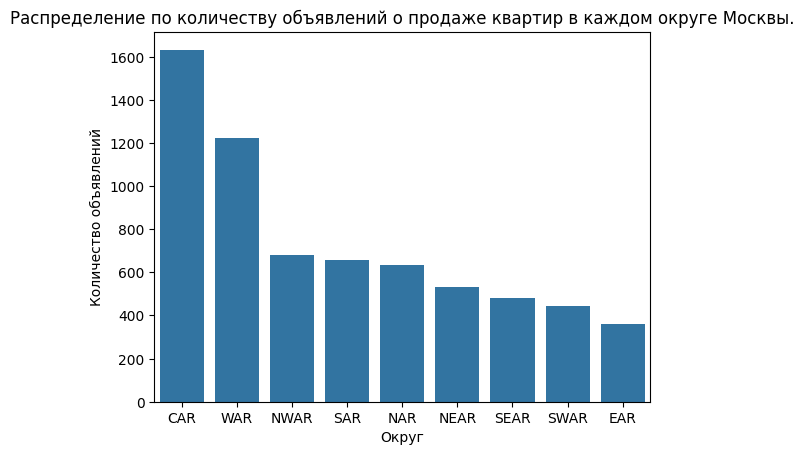

In [ ]:
order = new_df['region_of_moscow'].value_counts(ascending=False).index
sns.countplot(x='region_of_moscow', data=new_df, order=order)
plt.title("Распределение по количеству объявлений о продаже квартир в каждом округе Москвы.")
plt.xlabel("Округ")
plt.ylabel("Количество объявлений")

Так как разброс цен очень сильный, то разделим данные по классам цены, добавив новый столбец - class:
- Econom class - от 200 тр до 500 тр;
- Comfort class - от 500 тр до 1200 тр;
- Business class - от 1200 тр.


In [ ]:
# Функция определяет класс квартиры в зависимости от стоимости
def rang(row):
    x=''
    if row['price_of_metr'] <= 500000:  # эконом-класс, стоимость до 500 тыс. руб.
        x='Econom'
    elif row['price_of_metr'] <= 1200000: # комфорт-класс, стоимость от 500 тыс. руб. до 1200 тыс. руб.
        x='Comfort'
    elif row['price_of_metr'] <= 7052143.40:  # бизнесс-класс, стоимость от 1200 тыс. руб.
        x='Business '
    return x


new_df['class'] = new_df.apply(rang, axis =1)  # добавление нового столбца class


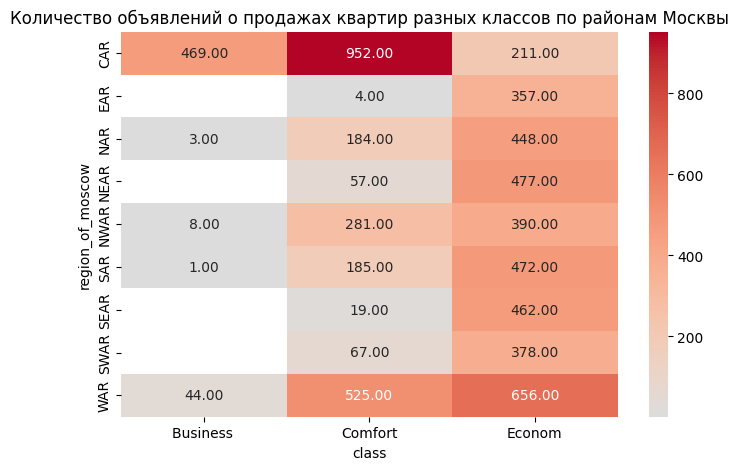

In [ ]:
category = pd.pivot_table(data=new_df, index='region_of_moscow', columns='class', values='price', aggfunc='count')
category

plt.figure(figsize=[8, 5])
sns.heatmap(category, annot=True, cmap='coolwarm',center=0.117, fmt=',.2f')
plt.title("Количество объявлений о продажах квартир разных классов по районам Москвы")
plt.show()

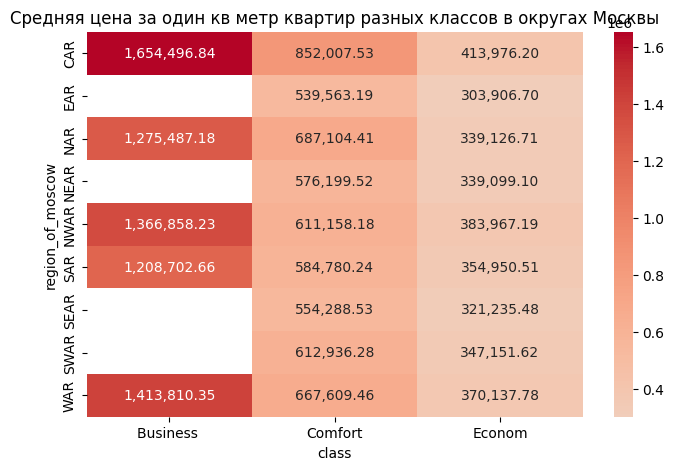

In [ ]:
av_area = pd.pivot_table(data=new_df, index='region_of_moscow', columns='class', values='price_of_metr', aggfunc='mean')
av_area

plt.figure(figsize=[8, 5])
sns.heatmap(av_area, annot=True, cmap='coolwarm', center=0.117, fmt=',.2f')
plt.title("Средняя цена за один кв метр квартир разных классов в округах Москвы")
plt.show()

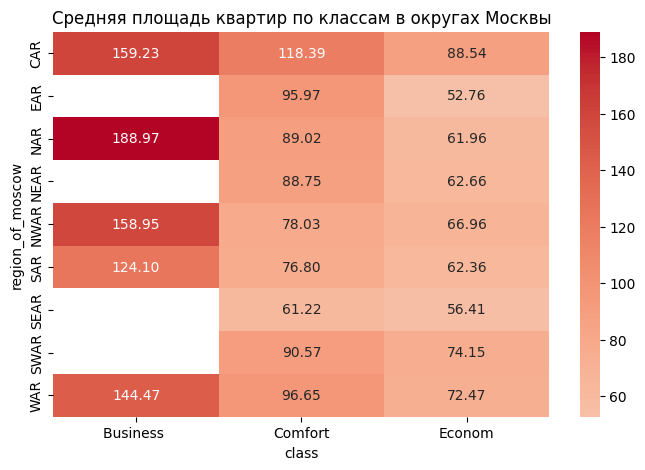

In [ ]:
av_area = pd.pivot_table(data=new_df, index='region_of_moscow', columns='class', values='total_area', aggfunc='mean')
av_area

plt.figure(figsize=[8, 5])
sns.heatmap(av_area, annot=True, cmap='coolwarm',center=0.117, fmt=',.2f')
plt.title("Средняя площадь квартир по классам в округах Москвы")
plt.show()

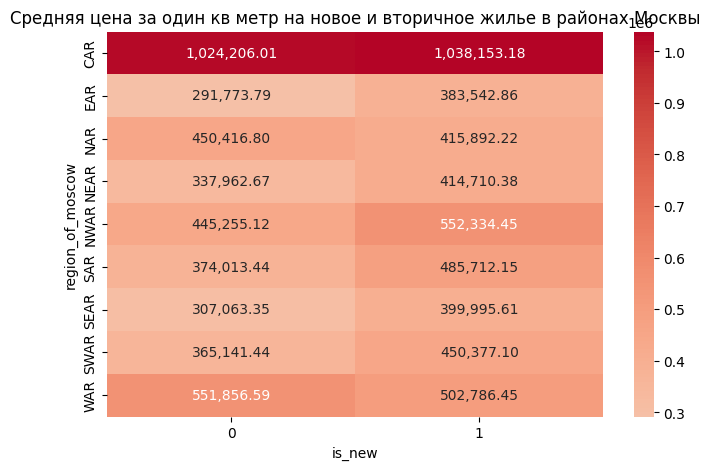

In [ ]:
av_price = pd.pivot_table(data=new_df, index='region_of_moscow', columns='is_new', values='price_of_metr', aggfunc='mean')
av_price
plt.figure(figsize=[8, 5])
sns.heatmap(av_price, annot=True, cmap='coolwarm',center=0.117, fmt=',.2f')
plt.title("Средняя цена за один кв метр на новое и вторичное жилье в районах Москвы")
plt.show()

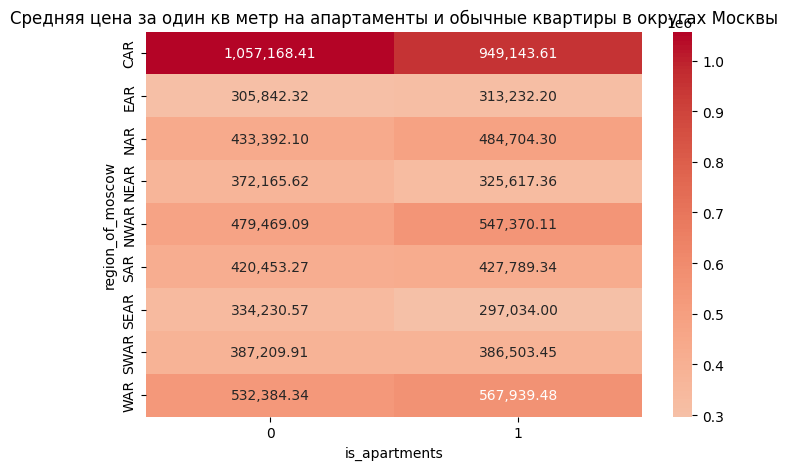

In [ ]:
av_price2 = pd.pivot_table(data=new_df, index='region_of_moscow', columns='is_apartments', values='price_of_metr', aggfunc='mean')
av_price2
plt.figure(figsize=[8, 5])
sns.heatmap(av_price2, annot=True, cmap='coolwarm',center=0.117, fmt=',.2f')
plt.title("Средняя цена за один кв метр на апартаменты и обычные квартиры в округах Москвы")
plt.show()

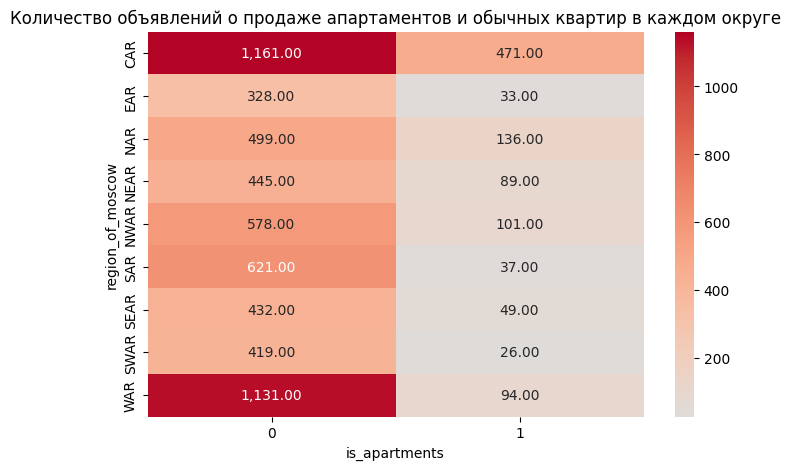

In [ ]:
av_count = pd.pivot_table(data=new_df, index='region_of_moscow', columns='is_apartments', values='price', aggfunc='count')
av_count
plt.figure(figsize=[8, 5])
sns.heatmap(av_count, annot=True, cmap='coolwarm',center=0.117, fmt=',.2f')
plt.title("Количество объявлений о продаже апартаментов и обычных квартир в каждом округе")
plt.show()

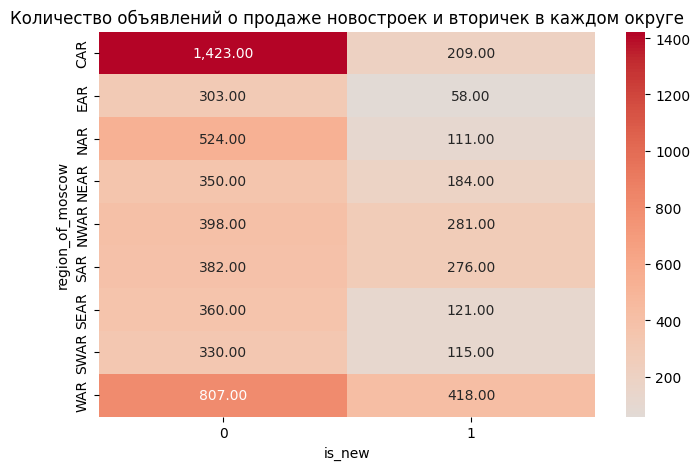

In [ ]:
c_price = pd.pivot_table(data=new_df, index='region_of_moscow', columns='is_new', values='price', aggfunc='count')
c_price
plt.figure(figsize=[8, 5])
sns.heatmap(c_price, annot=True, cmap='coolwarm',center=0.117, fmt=',.2f')
plt.title("Количество объявлений о продаже новостроек и вторичек в каждом округе")
plt.show()

Цены на квартиры в Москве имеют очень сильный разброс (std = 93 538 800.24).

Поэтому цены разделены по следующим категориям (классам), цена за кв. метр:
- Econom class - от 200 тыс. руб.  до 500 тыс. руб.;
- Comfort class - от 500 тыс. руб. до 1200 тыс. руб.;
- Business class - от 1200 тыс. руб.

В Центральном административном округе (ЦАО) продаются самые дорогие квартиры, и почти все квартиры бизнес-класса.

На западе (ЗАО) продаются квартиры всех классов, по количеству в этом округе больше всего объявлений о продаже квартир эконом-класса, при этом средняя цена на них, после ЦАО, самая высокая.

Наиболее бюджетные квартиры эконом-класса с наименьшей площадью продаются в Восточном административном округе (EAR) (ВАО). Также в этом округе продается всего 4 квартиры комфорт-класса.

Большое количество квартир комфорт класса продаются в округах: Северный административный округ (NAR) (САО), Северно-Восточный административный округ (NEAR) (СВАО), и Западный административный округ (WAR) (ЗАО).

Средняя площадь во всех округах на квартиры разного класса примерно одинаковая.

**3. Проверка гипотез**

В данном блоке проверим три гипотезы:

1. Цены кв. метр во всех районах г. Москвы не отличаются;
2. Средняя стоимость кв метра на новостройки и вторичное жилье не отличается;
3. Средняя стоимость кв метра на апартаменты и обычные квартиры не отличается.

Для проверки первой гипотезы используем визуализацию, т.к. проведение статического теста для множественных выборок (районы Москвы) мало полезно.

Для проверки остальных гипотез используем статические тесты.


**3. 1. Гипотеза: Цены кв. метр во всех районах г. Москвы не отличаются.**



Для понимания отличий цен за кв. метр по районам Москвы представим график ниже:


In [ ]:
fig = px.box(
    data_frame=new_df,
    x='region_of_moscow',
    y='price_of_metr',
    color='region_of_moscow',
    title='Распределение стоимости одного кв. метра по района Москвы',
)
fig.show()

Как видно на визуализации, цены за кв. метр по районам Москвы отличаются. Минимальные цены за кв метр по всем районам примерно одинаковые около 200 тыс.руб. Но видно, что отличаются медианные значения, наибольшое - в центре ЦАО (CAR) - 950 тыс.руб, и наименьшее - на востоке в ВАО (EAR) - 288 тыс.руб. Самые дорогие квартиры продаются в ЦАО (CAR) и на западе ЗАО (WAR), самые дешевые в ВАО(EAR), ЮВАО (SEAR). В остальных районах цены примерно одинаковые.  

Н0 отклоняется, т.к. p-value < 0,05.

Вывод: Мы можем не сказать, что средние цены на квадратный метр квартир в разных районах Москвы не отличаются.

**3.2. Гипотеза: Средняя стоимость кв метра на новостройки и вторичное жилье не отличается**

Разделим данные на две выборки: new и old.

Приведем выборки к одному размеру.

Проверим данные на нормальность с помощью графиков.

Далее в зависимости от результатов, выполним t-тест или тест Манна-Уитни.


In [ ]:
new = new_df[(new_df['is_new'] == 1)]['price_of_metr']
old = new_df[(new_df['is_new'] == 0)]['price_of_metr']

In [ ]:
print(new.shape)
print(old.shape)

(1773,)
(4877,)


Так как выборки разного размера, то для корректности проведения стат. теста, приведем выборку old к размеру, что и выборка new:

In [ ]:
old = old.sample(1773)

Посмотрим на график плотности распределения каждой выборки:

<Axes: xlabel='price_of_metr', ylabel='Count'>

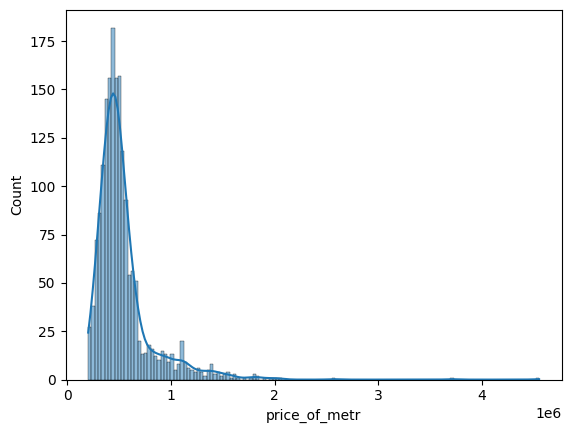

In [ ]:
sns.histplot((new), kde=True) # распределение выборки new

Распределение кажется нормальным, т.к. наибольшее количество квартир сгруппировано вокруг среднего значения цены за кв метр, и распределение относительно симметрично.

<Axes: xlabel='price_of_metr', ylabel='Count'>

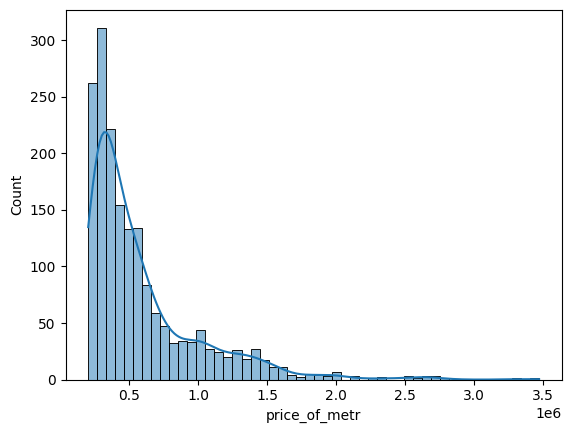

In [ ]:
sns.histplot((old), kde=True) # распределение выборки old

Распределение также можно назвать нормальным, видно колокообразность, и относительную симметричность.   

Для проверки гипотезы проведем тест Стьюдента.

Сформулируем гипотезы:

Н0 - Средняя стоимость на новостройки и вторичное жилье не отличается

Н1 - Средняя стоимость на новостройки и вторичное жилье отличается

Уровень значимости - 0.05

In [ ]:
stat, p = stats.ttest_ind(new, old)
print(f"p = {p:.10f}")

if p > 0.05:
    print("Средняя стоимость на новостройки и вторичное жилье не отличается")
else:
    print("Средняя стоимость на новостройки и вторичное жилье отличается")

p = 0.0006367178
Средняя стоимость на новостройки и вторичное жилье отличается


Подтвердим альтернативную гипотезу графиком:

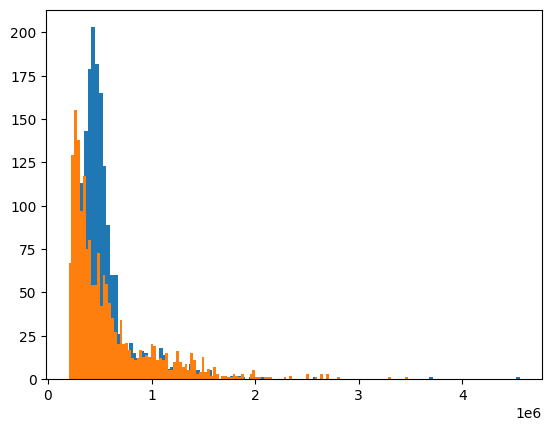

In [ ]:
plt.hist(new, bins=120);
plt.hist(old, bins=120);

Вывод: Мы не можем принять нулевую гипотезу, т.е. можно сказать, что цены за кв. метр в новостройках и вторичках отличаются.

**3.3. Гипотеза: Средняя стоимость кв метра на апартаменты и обычные квартиры не отличается**


Разделим данные на две выборки: apar и notapar (апартаменты и неапартаменты).

Приведем выборки к одному размеру.

Проверим данные на нормальность с помощью графиков.

Далее в зависимости от результатов выполним t-тест Стьюдента или тест Манна-Уитни.


In [ ]:
apar = new_df[(new_df['is_apartments'] == 1)]['price_of_metr']
notapar = new_df[(new_df['is_apartments'] == 0)]['price_of_metr']

In [ ]:
print(apar.shape) #размеры выборок
print(notapar.shape)

(1036,)
(5614,)


Так как выборки разного размера, то для корректности проведения стат. теста, приведем выборку notapar к размеру, что и выборка apar:

In [ ]:
notapar = notapar.sample(1036)

Посмотрим на график плотности распределения каждой выборки:

<Axes: xlabel='price_of_metr', ylabel='Count'>

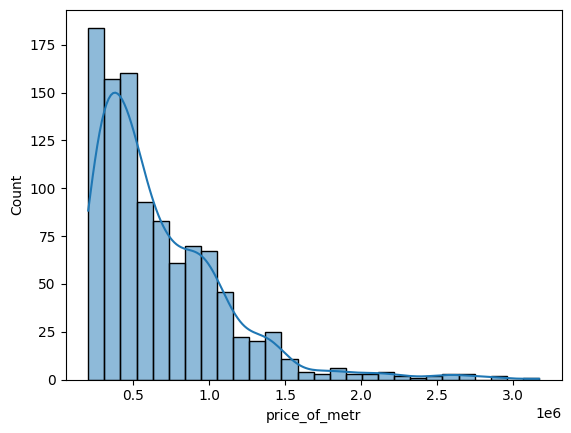

In [ ]:
sns.histplot((apar), kde=True) # распределение выборки apar

<Axes: xlabel='price_of_metr', ylabel='Count'>

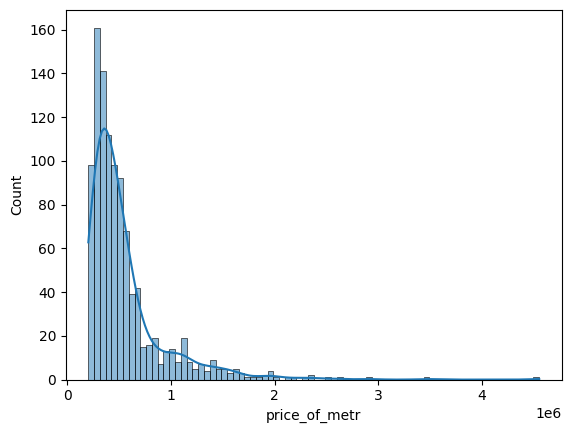

In [ ]:
sns.histplot((notapar), kde=True) # распределение выборки notapar

В двух выборках распределение близко к нормальному, т.е. наибольшее количество наблюдений сосредоточено в центре.
Для проверки гипотезы проведем тест Стьюдента.

Сформулируем гипотезы:

Н0 - Средняя стоимость кв метра на апартаменты и обычные квартиры не отличается

Н1 - Средняя стоимость кв метра на апартаменты и обычные квартиры отличается

Уровень значимости 0.05

In [ ]:
stat, p = stats.ttest_ind(apar, notapar)
print(f"p = {p:.20f}")

if p > 0.05:
    print("Средняя стоимость кв метра на апартаменты и обычные квартиры не отличается")
else:
    print("Средняя стоимость кв метра на апартаменты и обычные квартиры отличается")

p = 0.00000000000221296929
Средняя стоимость кв метра на апартаменты и обычные квартиры отличается


Подтвердим альтернативную гипотезу графиком:

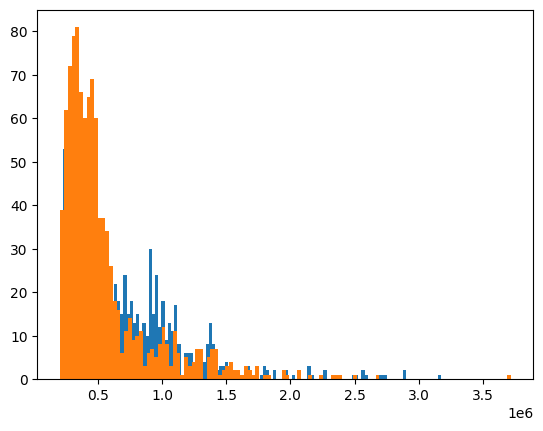

In [ ]:
plt.hist(apar, bins=120);
plt.hist(notapar, bins=120);

Вывод: Нулевая гипотеза отклоняется, т.е. можно сказать, что цены за кв. метр в апартаментах и неапартаментах отличаются.

**4. Матрица корреляций и попарные зависимости переменных.**

В данном блоке посмотрим на корреляционную связь переменных, и попарную зависимость.

4.1. Матрица корреляций Пирсона:

<Axes: >

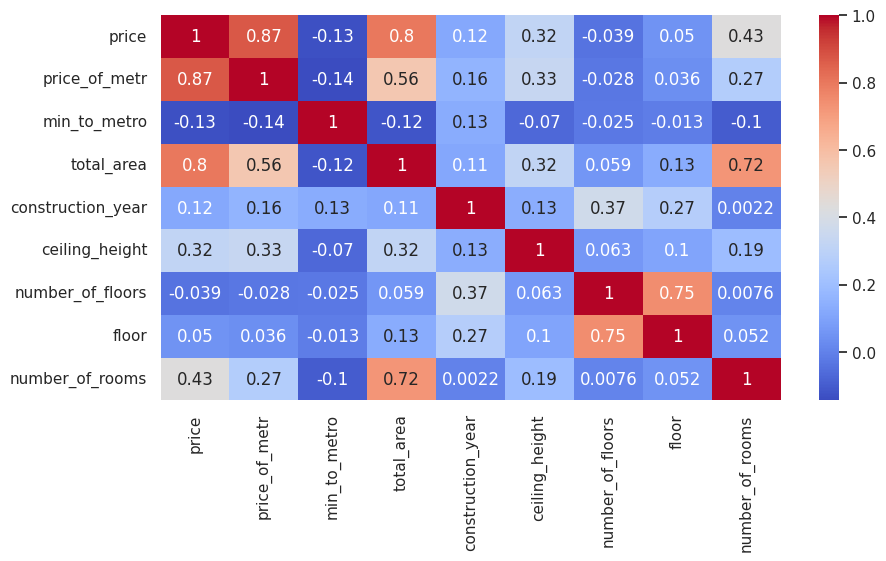

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(new_df[[ 'price', "price_of_metr", "min_to_metro", "total_area", 'construction_year', 'ceiling_height', 'number_of_floors', 'floor', 'number_of_rooms']].corr(), cmap="coolwarm", annot=True)

Как видно из тепловой карты корреляции Пирсона наибольшая положительная линейная связь наблюдается между показателями price и total_area, т.е. с увеличением стоимости квартиры растет и общая площадь. Опустим связи между: price_of_metr и total_area, price и price_of_metr, т.к. price_of_metr расчитывается из показателей price и total_area.

Также можно заметить слабые положительные связи (около 0,3) между переменными:
- стоимостью и высотой потолков,
- общей площадью и высотой потолков,
- годом постройки и количеством этажей в доме.

Корреляционная связь остальных показателей очень слабая.




4.2. Попарные зависимости всех переменных:

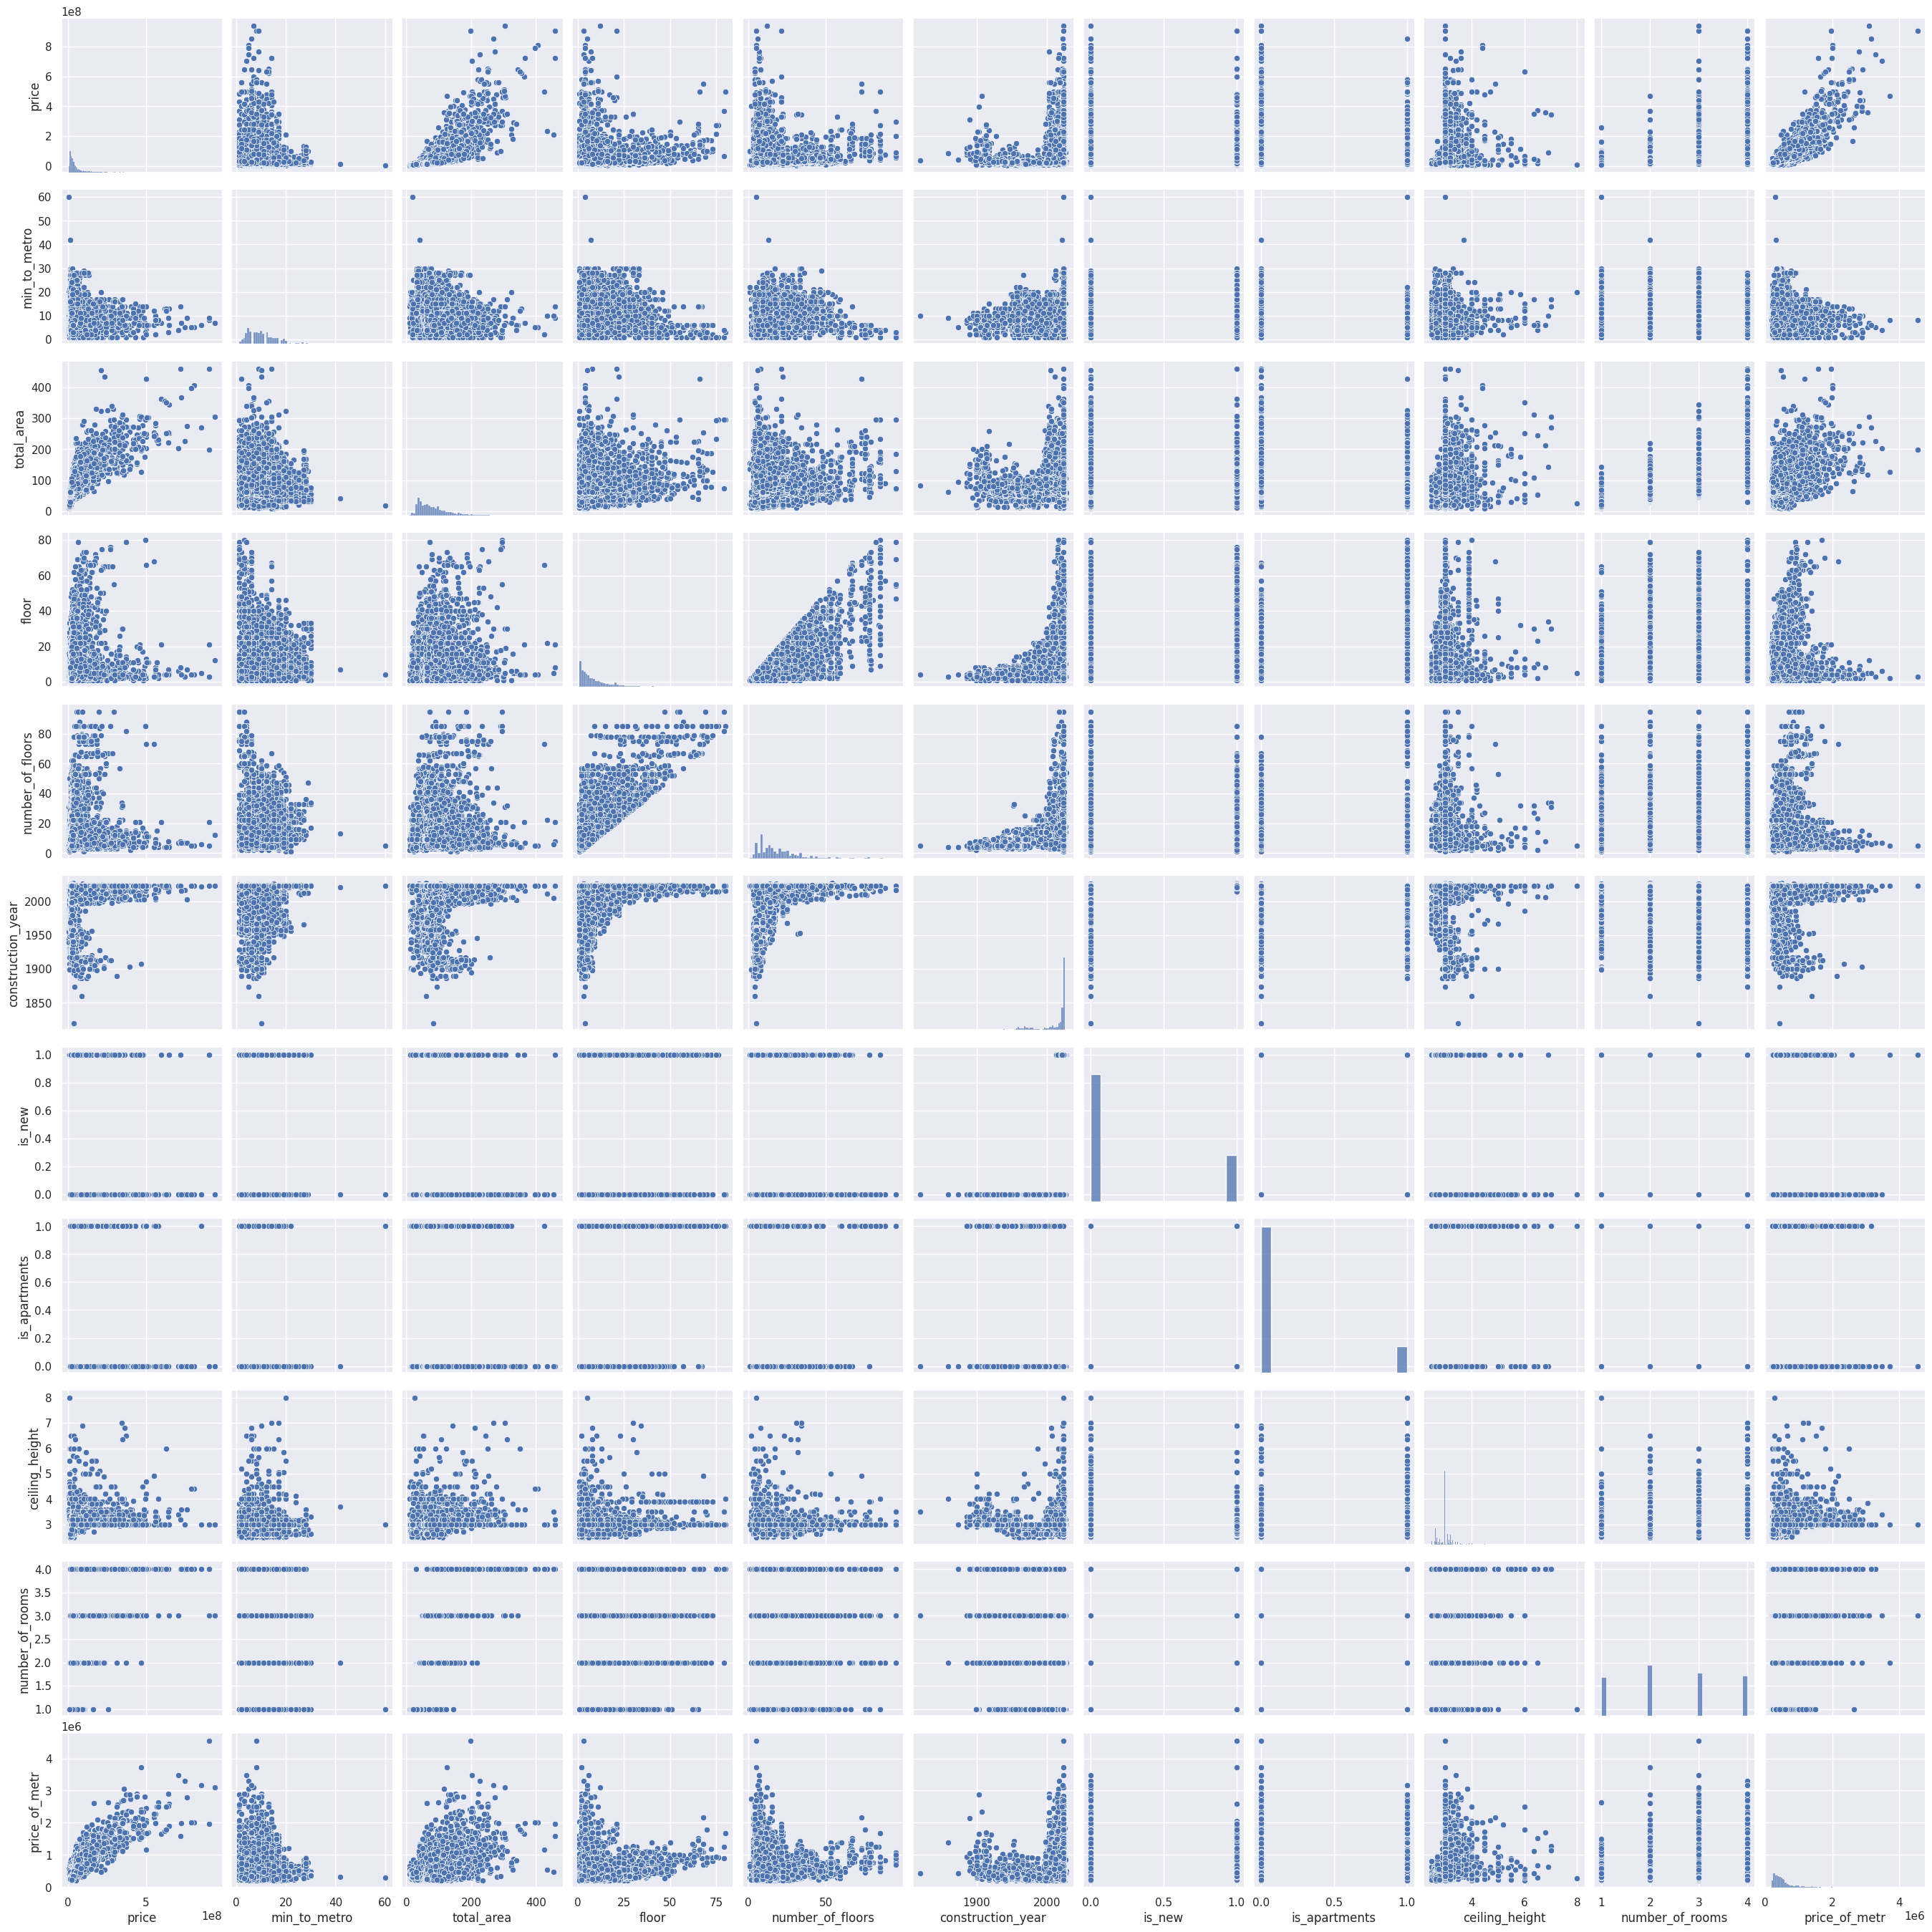

In [ ]:
sns.pairplot(new_df)

Распределение цены за кв метр близкое к нормальному, т.е. основная часть данных сосредоточена в центре, при этом также есть значительное количество выбросов в большое сторону, что дает смещение вправо.

Проанализируем зависимости цены за кв метр от остальных признаков:
 - Зависимость цены и цены за кв метр – линейная, что логично;
-  Цена за кв метр не зависит линейно от времени до метро, цена может быть как низкой, так и высокой на квартиру, находящуюся рядом или далеко от метро;
- Линейно зависимы признаки: цены за км метр и общая площадь, что подтверждает положительный коэффициент корреляции Спирмена = 0,8;
- Этаж квартиры и цена за кв метр – не имеют линейной зависимости. Цена может быть как низкой, так и высокой на этажи от 0 до примерно 20, далее видно, что с увеличением цены – повышается этаж;
- Этажность дома и цена за кв метр – тоже не имеют линейной зависимости. При этом видна схожесть графиков этажа квартиры и этажа дома;
- Год постройки и цена за кв метр – тоже не имеют линейной зависимости. Цена может быть высокой и низкой на квартиры одних годов постройки. При этом видно, что самая высокая цена – выброс на квартиры 2020-х годов.
- Новостройки, вторички и цена за кв метр. Цена на новостройки имеют больше выбросов и в целом ниже, чем цены на вторички;
- Апартаменты, обычные квартиры и цена за кв метр. Неапартаменты стоят дороже, апартаментов.
- Высота потолков и цена за кв метр – тоже не имеют линейной зависимости. Цена на разные высоту потолков расположены хаотично;
- Количество комнат и цена за кв метр. Можно сказать, что цены за кв метр на 2, 3, 4комнатные квартиры – примерно одинаковые, но на 3-комнатные – есть выбросы в большую сторону.

Вывод: Цена за кв метр практически не зависит от всех признаков, кроме общей площади.


**5. Построение модели линейной регресии для прогнозирования стоимости квартиры в Москве**

Для построения модели множественной линейной регрессии прогнозирования зависимой переменной - price, уберем независимые переменные на основании следующих признаков:
- коллинеарные: это price_of_metr, number_of_floors, number_of_rooms;
- категориальные: class;
- переменные с низкой корреляцией с price: min_to_metro, construction_year, floor.

В итоге оставим следующие переменные:

- Зависимая переменная - price;

- Независимые переменные - 'total_area', 'ceiling_height', 'is_new', 'is_apartments', 'region_of_moscow'.

Преобразуем region_of_moscow в фиктивную переменныю с помощью метода get_dummies.
      

In [ ]:
df_model = pd.get_dummies(new_df)

In [ ]:
X = df_model[['total_area', 'ceiling_height', 'is_new', 'is_apartments', 'region_of_moscow_EAR',
           'region_of_moscow_NAR', 'region_of_moscow_NEAR', 'region_of_moscow_NWAR', 'region_of_moscow_SAR', 'region_of_moscow_SEAR', 'region_of_moscow_SWAR', 'region_of_moscow_WAR']]
y = df_model[['price']]

Разделим выборку на тестовую и тренировочную:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(5320, 12)

In [ ]:
y_train.shape

(5320, 1)

Запустим модель линейной регресии:

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_ # коэф наклона прямой

array([[  1121374.1198678 ,   8163724.44504634,    -96282.83644303,
         -1943064.18842695, -44359432.9231013 , -45955176.2835857 ,
        -49963397.19092564, -45221680.0949048 , -46977324.63940869,
        -45490306.48795523, -56249557.36593465, -46718509.51151405]])

In [ ]:
lm.intercept_ # коэф прямой

array([-22394585.60639434])

In [ ]:
# Предсказание по тестовой выборке
y_pred = lm.predict(X_test)

In [ ]:
# Размер выборки предсказания тестовой выборки
y_pred.shape

(1330, 1)

In [ ]:
# Предсказание по тренировочной выборки
y_pred_train = lm.predict(X_train)

In [ ]:
# Размер выборки предсказания тренировочной выборки
y_pred_train.shape

(5320, 1)

In [ ]:
# Метрика качества модели на тренировочной выборки:
print(f'RMSE Корень из среднеквадратичной ошибки: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')

RMSE Корень из среднеквадратичной ошибки: 48199118.59547916


In [ ]:
# Метрика качества модели на тестовой выборке:
print(f'RMSE Корень из среднеквадратичной ошибки: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Корень из среднеквадратичной ошибки: 38954054.674656555


Вывод: RMSE Корень из среднеквадратичной ошибки с тестовой выборкой - 38,9 млн. ед., а с тренировочной выборкой - 48,1 млн. ед., на такой результат влияет сильный разброс цен в исходных данных (std = 83 млн ед). Для получения более работоспособной модели следует сегментировать объявления в зависимости от класса жилья (элитное, бюджетное и тд). По исходным данным это делать не совсем корректно, т.к. имееющиеся переменные (высота потолков, общая площадь, район и т.д.) не дают четкого понимания сегмента. Не хватает других факторов, которые будут конкретно обозначать класс, к примеру, элитное жилье отличается от другого тем, что имеет особый уровень приватности и комфорта, локация, нюансы архитектуры. Но с другой стороны, эти переменные могут только захламлять отченость, поэтому достаточно будет только признака класса жилья, которые будет указываться на этапе ввода объявления.


**Общие выводы и заключения.**

По бизнес-задачам:

•	Для задачи построения отчетности были преобразованы и очищены сырые данные. Это позволит выработать единую иерархию метрик и внедрить их в компанию.

•	Анализ стоимости кв метр квартир позволил определить основных стейкхолдеров, основные метрики и предоставить рекомендации по их улучшению: Застройщики, Риелторы, Агентства недвижимости, Банки, Покупатели.

•	Прогноз модели Линейной Регрессии позволит стейкхолдерам предугадывать стоимость квартир для продажи, это позволит строить бюджет, ориентироваться по факторам, которые влияют на цену, и также эффективно конкурировать.

Для эффективного прогнозирования стоимости квартир, а также анализа рынка продажи недвижимости отчетность можно дополнить следующими признаками:

- Дата объявления и дата сделки:
С помощью данных признаков можно понять за какое время продаются квартиры, а это дополнительная метрика - длительности продажи. Ее оценка даст понимание какие еще факторы влияют на цену, и какие квартиры лучше продаются.
- Итоговая цена сделки:
Позволит понять, как меняется цена в объявлении и цена сделки, какие факторы могут повлиять на итоговую цену и тд
- Класс жилья:
Позволит точно сегментировать объявления, и прогнозировать будущую цену.
- Географические данные:
Дополнение географическим данными (широтой и долготой) позволит четко понимать местоположение квартиры, определять район, окружающую инфраструктуру;
- Ближайшее метро:
В Москве основной транспорт – это метро, обывательское мнение – лучше жить в квартире в пешей доступности от метро;
- Наличие лифта:
В Москве средняя этажность домов – 10. Наличие грузового и обычного лифта является также одним из условием выбора квартиры.
- Площадь кухни:
В типовых домах, построенных примерно с 1960 до 1990 гг обычно кухни площадью около 3 квм, что очень неудобно даже для одного человека. Поэтому для многих людей просторная кухня может быть основополагающим фактором при выборе квартиры.
- Наличие лоджии или балкона:
Балкон или лоджия — это дополнительное изолированное место в квартире. Может использоваться и для складирования вещей, так и для места отдыха.
- Наличие парковки:
Актуально для многих людей, тк многие имеют личный автомобиль.


**Рекомендации стейкхолдерам**:

Стейкхолдерам для эффективных продаж можно порекомендовать сегментировать рынок в зависимости от дохода потенциальных клиентов, т.к. цены на квартиры в Москве очень сильно варьируются. Для людей с высокими доходами актуальны будут районы в центре (ЦАО) и на западе (ЗАО). Для стратегии нужно понимать, что большое предложение в этих районах может говорить о низком спросе, поэтому необходимы вложения в маркетинг для привлечения нужного сегмента, и сотрудничество с кредитными организациями и девелоперами/застройщиками для выгодных условий по сделкам. Для среднего класса будут привлекательны по цене районы Северный административный округ (NAR) (САО), Северно-Восточный административный округ (NEAR) (СВАО), Южный административный округ (SAR) (ЮАО), Юго-Западный административный округ (SWAR) (ЮЗАО), Северо-Западный административный округ (NWAR) (СЗАО). В них развитая инфраструктура, активно развивается строительство новых домов, и квартиры средние по площади. Также можно обратить внимание на районы с бюджетными квартирами – это Восточный административный округ (EAR) (ВАО), Юго-Восточный административный округ (SEAR) (ЮВАО). Не смотря на промышленные зоны в этих районах довольно много парков, и стоимость кв метра самые низкие по сравнению с другими районами, что тоже довольно актуально с дорогой ипотекой в текущее время.
